<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B5%20%D0%BA%D0%BE%D0%BB%D0%B8%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%BE%20%D1%81%D0%BB%D0%BE%D0%B3%D0%BE%D0%B2%20%D1%82%D0%BE%D0%BA%D0%B5%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 49.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=9d7ca3c2c026043ed384778bc6f85bb499d9f601a8ad0bbdc1d40055e51dc28b
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


<ipython-input-2-2ec926452b34>:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


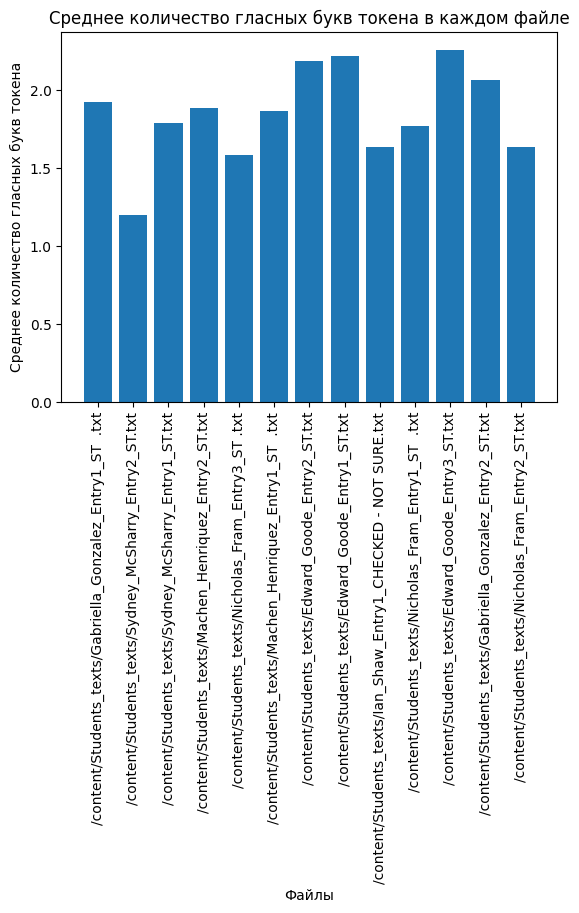

In [2]:
import os
import glob
import pymorphy2
import matplotlib.pyplot as plt

# Создаем экземпляр класса MorphAnalyzer для работы с морфологией русского языка
morph = pymorphy2.MorphAnalyzer()

# Путь к папке с файлами txt
folder_path = "/content/Students_texts"

# Получаем список всех файлов txt в папке
file_list = glob.glob(os.path.join(folder_path, "*.txt"))

# Список для хранения среднего количества гласных букв токена
avg_vowel_counts = []

# Обрабатываем каждый файл
for file_path in file_list:
    with open(file_path, 'r') as file:
        text = file.read()
        tokens = text.split()  # Разделение текста на токены

        total_vowel_count = 0
        token_count = 0

        # Вычисляем количество гласных букв для каждого токена
        for token in tokens:
            parsed_token = morph.parse(token)[0]

            # Проверяем, есть ли нормализованная форма слова
            if parsed_token.normal_form is not None:
                normalized_word = parsed_token.normal_form
                vowel_count = sum(letter in 'аеёиоуыэюя' for letter in normalized_word.lower())
                total_vowel_count += vowel_count
                token_count += 1

        # Среднее количество гласных букв для файла
        avg_vowel_count = total_vowel_count / token_count if token_count > 0 else 0
        avg_vowel_counts.append(avg_vowel_count)

# Создание столбчатой диаграммы
plt.bar(range(len(file_list)), avg_vowel_counts, tick_label=file_list)
plt.xlabel('Файлы')
plt.ylabel('Среднее количество гласных букв токена')
plt.title('Среднее количество гласных букв токена в каждом файле')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()